## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score, plot_roc_curve, classification_report, plot_confusion_matrix

## Loading Dataset

In [6]:
from google.colab import files
  
uploaded = files.upload()

credit_df = pd.read_csv('UCI_Credit_Card.csv')
credit_df.head()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data information
This sections shows the information about data such as number of column and rows in dataset along with their data types. Then in cell below this one is the count of missing values in each column.

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Data Preprocessing 



In [8]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
# transforming values of term
credit_df.rename(columns = {'default.payment.next.month':'Default'}, inplace = True)
credit_df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [11]:
# replacing all values from emp_length feature except the year number
credit_df['SEX'].replace({1: 'male', 2 : 'female'}, regex=True, inplace = True)
credit_df['MARRIAGE'].replace({1: 'married', 2 : 'single', 3: 'others', 0: 'others'}, regex=True, inplace = True)
credit_df['EDUCATION'].replace({1: 'graduate school', 2 : 'university', 3: 'high school',
                               4:'others', 5: 'others', 6: 'others', 0 : 'others'}, regex=True, inplace = True)

credit_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


0    23364
1     6636
Name: Default, dtype: int64


Text(0.5, 1.0, 'Distribution of data into defaulter groups')

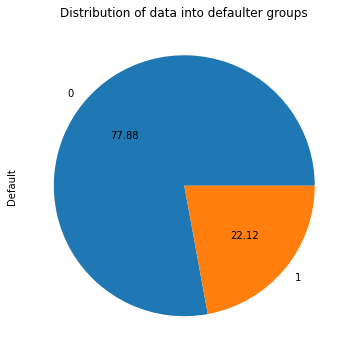

In [12]:
# distribution of data in target feature
print(credit_df['Default'].value_counts())
credit_df['Default'].value_counts().plot.pie(autopct="%.2f",subplots=True, figsize=(10, 6))
plt.title("Distribution of data into defaulter groups")

female    18112
male      11888
Name: SEX, dtype: int64


Text(0.5, 1.0, 'Gender wise defaulter distribution')

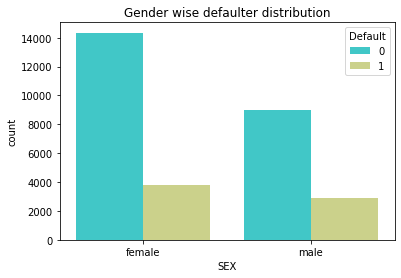

In [13]:
print(credit_df['SEX'].value_counts())
sns.countplot(x = 'SEX', hue = 'Default', data = credit_df,  palette='rainbow')
plt.title("Gender wise defaulter distribution")

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


Text(0.5, 1.0, 'Role of education in default')

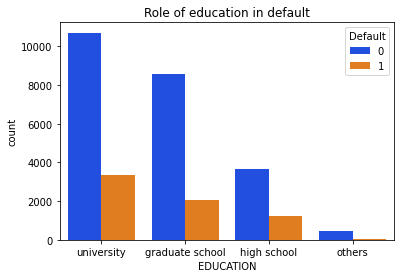

In [14]:
print(credit_df['EDUCATION'].value_counts())
sns.countplot(x = 'EDUCATION', hue = 'Default', data = credit_df,  palette='bright')
plt.title("Role of education in default")

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


Text(0.5, 1.0, 'Marriage and default position')

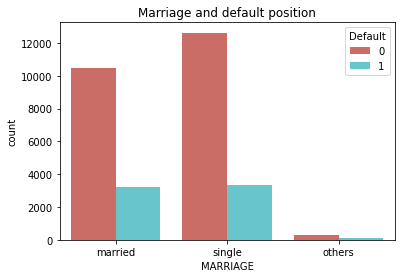

In [15]:
print(credit_df['MARRIAGE'].value_counts())
sns.countplot(x = 'MARRIAGE', hue = 'Default', data = credit_df,  palette='hls')
plt.title("Marriage and default position")

Text(0.5, 1.0, 'Age wise distribution of defaulters')

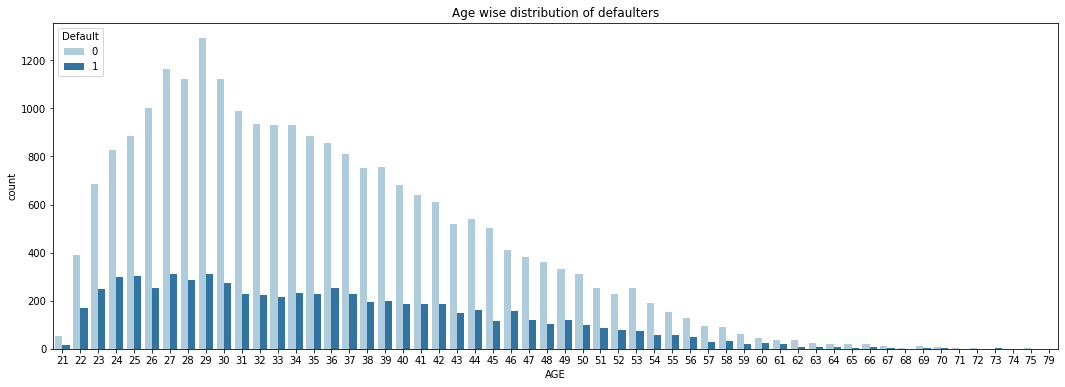

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'AGE', hue = 'Default', data = credit_df,  palette='Paired')
plt.title("Age wise distribution of defaulters")

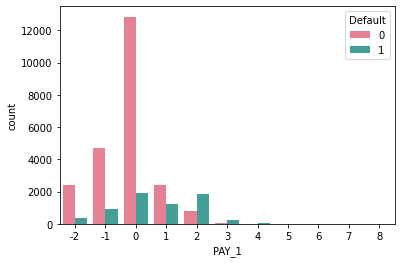

In [17]:
sns.countplot(x = 'PAY_1', hue = 'Default', data = credit_df,  palette='husl')

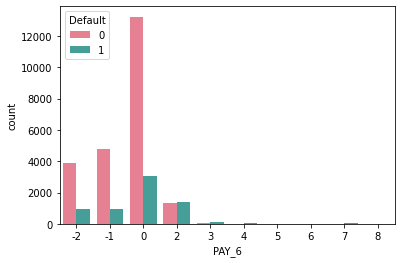

In [18]:
sns.countplot(x = 'PAY_6', hue = 'Default', data = credit_df,  palette='husl')

In [20]:
df_num = credit_df.select_dtypes(exclude='object')
print("Numerical data columns are: ", df_num.columns)
df_cat = credit_df.select_dtypes(include='object')
print("Categorical type  columns are: ", df_cat.columns)

Numerical data columns are:  Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')
Categorical type  columns are:  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')


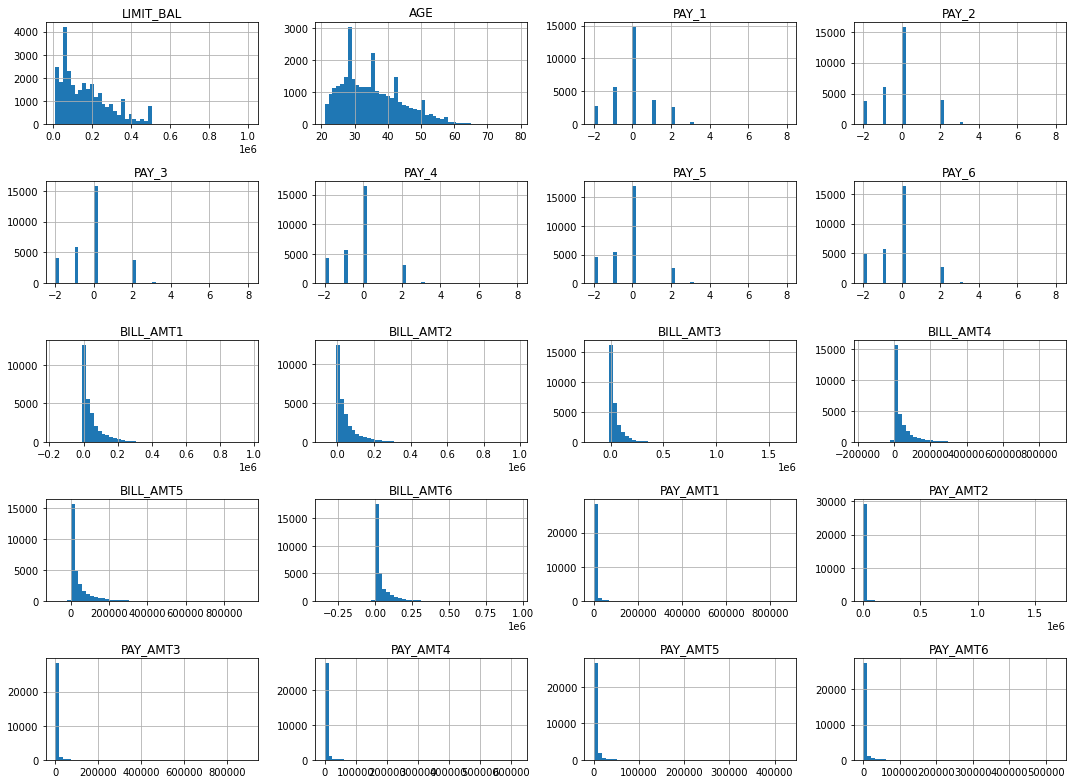

In [21]:
df_num = df_num.drop(['ID', "Default"], axis=1)
df_num.hist(bins = 50,figsize = (15,11))
plt.tight_layout()
plt.show()

### Data Preparation

In [22]:
cols = credit_df.select_dtypes("O").columns
cols

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [23]:
encoder = LabelEncoder()

for i in cols:
    credit_df[i] = encoder.fit_transform(credit_df[i])

credit_df = credit_df.drop(['ID'], axis=1)  
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


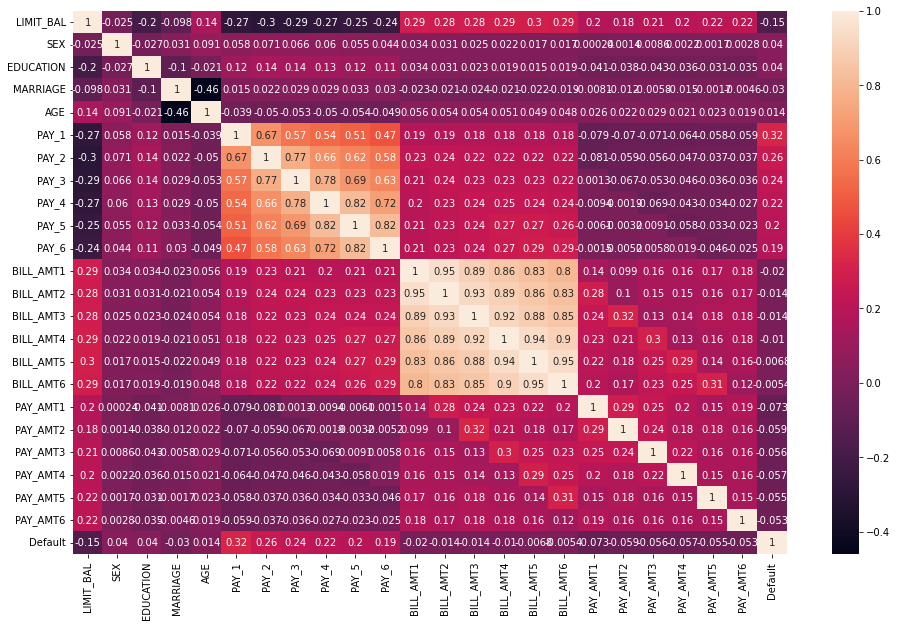

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(credit_df.corr(), annot=True)


In [25]:

X = credit_df.iloc[:, :-1]
y = credit_df.iloc[:, -1]

In [26]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Model Implmentation with unbalanced data

In [27]:
# Creating  and Training tunnned models
models = []
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGBoostClassifier', XGBClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))


+ ==================================================================================================== +
			1-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7521666666666667
--------------------------------------------------
F1 :  [0.85199562 0.23860727]
--------------------------------------------------
Reacll :  [0.91589985 0.17558402]
--------------------------------------------------
Precision :  [0.79642724 0.37220447]
--------------------------------------------------
Confusion Matrix....
 [[4280  393]
 [1094  233]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      4673
           1       0.37      0.18      0.24      1327

    accuracy                           0.75      6000
   macro avg       0.58      0.55      0.55      60

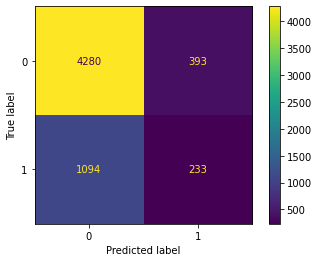

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 6.999 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For XGBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8193333333333334
--------------------------------------------------
F1 :  [0.89118651 0.46810599]
--------------------------------------------------
Reacll :  [0.9499251  0.35945742]
--------------------------------------------------
Precision :  [0.83928909 0.67088608]
--------------------------------------------------
Confusion Matrix....
 [[4439  234]
 [ 850  477]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0 

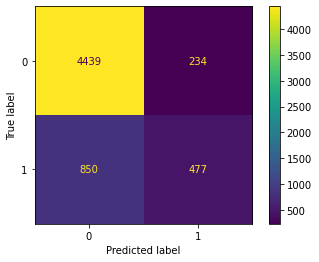

							-----------------------------------------------------------
							 Time for detection (XGBoostClassifier) : 3.023 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8133333333333334
--------------------------------------------------
F1 :  [0.88686869 0.46666667]
--------------------------------------------------
Reacll :  [0.93943933 0.36925396]
--------------------------------------------------
Precision :  [0.83986991 0.63389392]
--------------------------------------------------
Confusion Matrix....
 [[4390  283]
 [ 837  490]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           

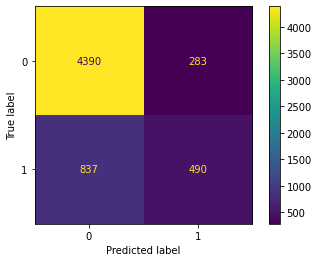

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 9.007 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.72
--------------------------------------------------
F1 :  [0.8183391  0.38953488]
--------------------------------------------------
Reacll :  [0.80975819 0.40391861]
--------------------------------------------------
Precision :  [0.82710383 0.37614035]
--------------------------------------------------
Confusion Matrix....
 [[3784  889]
 [ 791  536]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0

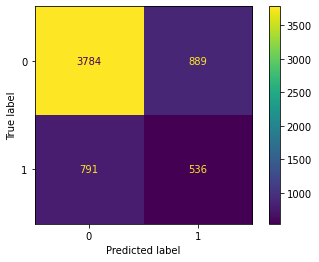

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.853 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Naive Bayes The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.41633333333333333
--------------------------------------------------
F1 :  [0.4469362  0.38214538]
--------------------------------------------------
Reacll :  [0.30280334 0.8161266 ]
--------------------------------------------------
Precision :  [0.85292345 0.24948169]
--------------------------------------------------
Confusion Matrix....
 [[1415 3258]
 [ 244 1083]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0    

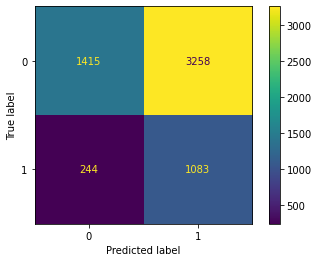

							-----------------------------------------------------------
							 Time for detection (Naive Bayes) : 0.235 seconds...
							-----------------------------------------------------------



In [28]:
# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [29]:
# Printing comparison of all models
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
display(comp)

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,KNeighborsClassifier,0.752167,"[0.7964272422776331, 0.3722044728434505]","[0.9158998502032956, 0.17558402411454407]","[0.8519956205832587, 0.23860727086533534]","[[4280, 393], [1094, 233]]"
1,XGBoostClassifier,0.819333,"[0.8392890905653243, 0.6708860759493671]","[0.9499251016477638, 0.359457422758101]","[0.8911865087331862, 0.4681059862610403]","[[4439, 234], [850, 477]]"
2,RandomForestClassifier,0.813333,"[0.8398699062559786, 0.6338939197930142]","[0.9394393323346887, 0.36925395629238883]","[0.8868686868686869, 0.4666666666666666]","[[4390, 283], [837, 490]]"
3,DecisionTreeClassifier,0.720000,"[0.8271038251366121, 0.376140350877193]","[0.8097581853199229, 0.40391861341371516]","[0.8183391003460208, 0.3895348837209302]","[[3784, 889], [791, 536]]"
4,Naive Bayes,0.416333,"[0.8529234478601567, 0.24948168624740844]","[0.3028033383265568, 0.8161266013564431]","[0.4469361970941251, 0.38214537755822164]","[[1415, 3258], [244, 1083]]"


### Model Implementation with balanced data



In [30]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=0)
X_bal, y_bal = over_sampler.fit_resample(X, y)
perc_inc = (X_bal.shape[0] - X.shape[0]) / X.shape[0]
print('Percentage increase from original data size is {:.2f}%'.format(perc_inc*100))

Percentage increase from original data size is 55.76%


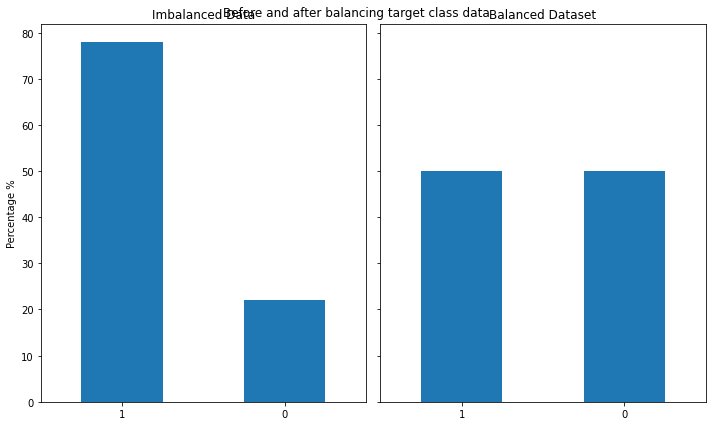

In [31]:
enc = LabelEncoder()
# define figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True, sharex=True)
fig.suptitle("Before and after balancing target class data")
ax1, ax = axes

# Plot target for imbalanced data
(pd.Series(y).value_counts(normalize=True) * 100).plot(kind='bar', ax=ax1)
ax1.set_title("Imbalanced Data")
ax1.tick_params(axis="x", rotation=0)
ax1.set_ylabel('Percentage %')

# Plot target for balanced data
y_bal_inv = pd.Series( enc.fit_transform(y_bal) )
(y_bal_inv.value_counts(normalize=True) * 100).plot(kind='bar', ax=ax)
ax.set_title("Balanced Dataset")

# display plot nicely
ax.tick_params(axis="x", rotation=0)
plt.tight_layout()
plt.savefig('imbal_bal.png', dpi=300)
plt.show()

In [32]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

+ ==================================================================================================== +
			1-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7112133533062273
--------------------------------------------------
F1 :  [0.68055391 0.73650298]
--------------------------------------------------
Reacll :  [0.61523646 0.80719024]
--------------------------------------------------
Precision :  [0.76138771 0.67719928]
--------------------------------------------------
Confusion Matrix....
 [[2875 1798]
 [ 901 3772]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.76      0.62      0.68      4673
           1       0.68      0.81      0.74      4673

    accuracy                           0.71      9346
   macro avg       0.72      0.71      0.71      93

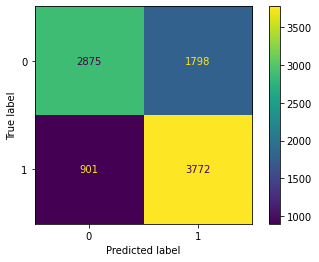

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 15.922 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For XGBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7241600684784935
--------------------------------------------------
F1 :  [0.74490402 0.69974377]
--------------------------------------------------
Reacll :  [0.80547828 0.64284186]
--------------------------------------------------
Precision :  [0.69280324 0.76769742]
--------------------------------------------------
Confusion Matrix....
 [[3764  909]
 [1669 3004]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0

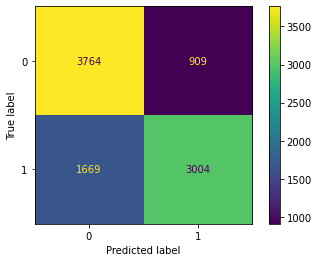

							-----------------------------------------------------------
							 Time for detection (XGBoostClassifier) : 5.402 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9329124759255296
--------------------------------------------------
F1 :  [0.93078706 0.93491124]
--------------------------------------------------
Reacll :  [0.90220415 0.9636208 ]
--------------------------------------------------
Precision :  [0.96124031 0.9078629 ]
--------------------------------------------------
Confusion Matrix....
 [[4216  457]
 [ 170 4503]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           

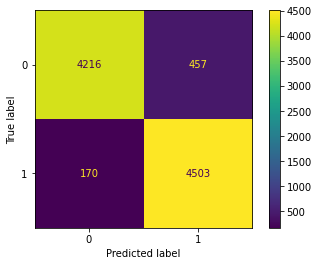

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 11.422 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8803766317141023
--------------------------------------------------
F1 :  [0.86939252 0.88965653]
--------------------------------------------------
Reacll :  [0.79627648 0.96447678]
--------------------------------------------------
Precision :  [0.95729354 0.82560909]
--------------------------------------------------
Confusion Matrix....
 [[3721  952]
 [ 166 4507]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

     

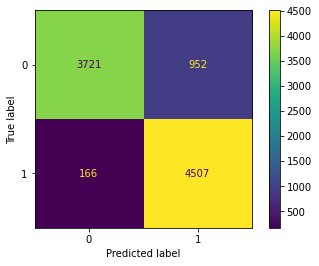

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 1.009 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Naive Bayes The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.5473999572009416
--------------------------------------------------
F1 :  [0.26638918 0.67275259]
--------------------------------------------------
Reacll :  [0.16434838 0.93045153]
--------------------------------------------------
Precision :  [0.70265325 0.52683873]
--------------------------------------------------
Confusion Matrix....
 [[ 768 3905]
 [ 325 4348]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0     

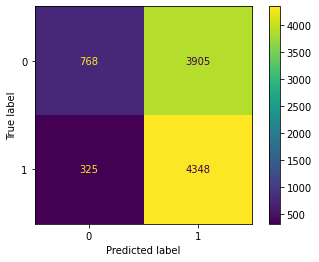

							-----------------------------------------------------------
							 Time for detection (Naive Bayes) : 0.274 seconds...
							-----------------------------------------------------------



In [33]:
# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [34]:
# Printing comparison of all models
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
display(comp)

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,KNeighborsClassifier,0.711213,"[0.7613877118644068, 0.6771992818671454]","[0.6152364647977745, 0.8071902418146801]","[0.6805539117055273, 0.7365029776432684]","[[2875, 1798], [901, 3772]]"
1,XGBoostClassifier,0.724160,"[0.6928032394625437, 0.7676974188602096]","[0.8054782794778514, 0.6428418574791355]","[0.7449040174153969, 0.6997437689261589]","[[3764, 909], [1669, 3004]]"
2,RandomForestClassifier,0.932912,"[0.9612403100775194, 0.9078629032258064]","[0.9022041515086668, 0.9636208003423925]","[0.9307870625896898, 0.9349112426035504]","[[4216, 457], [170, 4503]]"
3,DecisionTreeClassifier,0.880377,"[0.9572935425778235, 0.825609085913171]","[0.7962764819173979, 0.9644767815108067]","[0.869392523364486, 0.8896565337544413]","[[3721, 952], [166, 4507]]"
4,Naive Bayes,0.547400,"[0.7026532479414456, 0.5268387253120077]","[0.1643483843355446, 0.9304515300663385]","[0.26638917793964617, 0.6727525916756923]","[[768, 3905], [325, 4348]]"
